# 03_Avalia_modelo

## 01_import_bibliotecas

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score  
from IPython.display import display  

## 02_Carga_de_dados

In [4]:
input = 'https://github.com/Kinrider/tech_challenge_5/raw/refs/heads/main/01_fontes/arquivos_decision/fontes_tratadas/02_input_Kmeans.parquet'

In [5]:
df = pd.read_parquet(input)

## 03_Análise do Cotovelo (Inércia)

In [6]:
df_teste = df.copy()

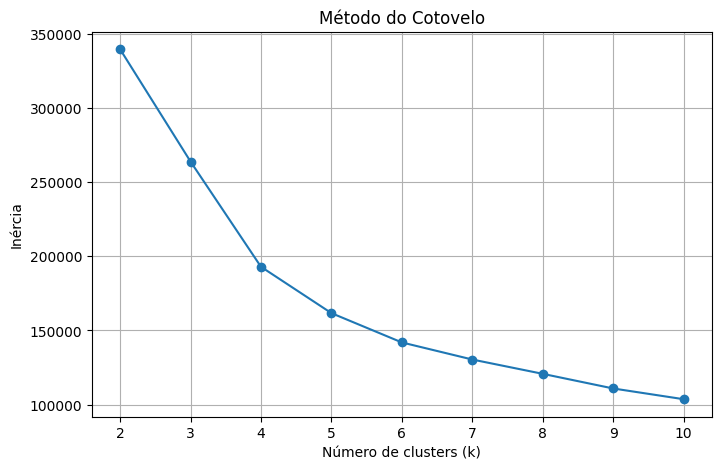

In [7]:
inercia = []
ks = range(2, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_teste)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(ks, inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

## 04_Avaliação com Silhouette Score

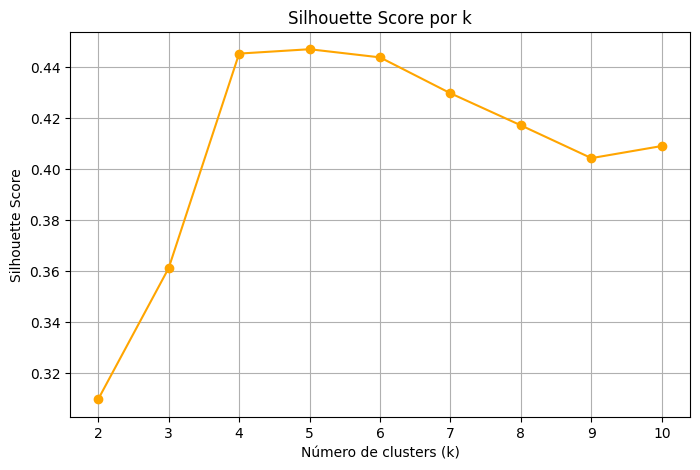

In [11]:
silhouettes = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_teste)
    score = silhouette_score(df_teste, labels)
    silhouettes.append(score)

plt.figure(figsize=(8, 5))
plt.plot(ks, silhouettes, marker='o', color='orange')
plt.title('Silhouette Score por k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [8]:
df_teste.head()

,remuneracao_zscore,nivel_hierarquico,tempo_experiencia_anos,quantidade_experiencias,nivel_educacional,experiencia_sap,categoria_profissional_Consultoria / Projetos,categoria_profissional_Indefinido,categoria_profissional_Jurídico,categoria_profissional_Logística / Suprimentos,categoria_profissional_Tecnologia da Informação,categoria_profissional_outros,tem_remuneracao_zscore,tem_tempo_experiencia_anos,tem_quantidade_experiencias,cluster
0,-0.047320,0,-0.630259,1.598060,3,1,0,0,1,0,0,0,1,1,1,1
1,-0.017370,2,-0.630259,-0.424810,3,0,1,0,0,0,0,0,1,1,1,3
2,0.012500,6,-0.114530,0.839484,3,1,0,0,0,0,0,1,1,1,1,3
3,-0.029981,0,-0.011385,1.092342,3,0,0,0,0,1,0,0,1,1,1,1
4,-0.047320,0,0.504344,0.080907,3,0,0,0,1,0,0,0,1,1,1,1


## 05_Execução do KMeans com k=4

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_teste['cluster'] = kmeans.fit_predict(df_teste)

## 06_Análise Descritiva dos Clusters

In [10]:
# Médias por cluster
medias = df_teste.groupby('cluster').mean(numeric_only=True)

# Proporções de flags
flags = [col for col in df_teste.columns if col.startswith('tem_')]
proporcoes = df_teste[flags + ['cluster']].groupby('cluster').mean()

# Tamanho de cada cluster
tamanho = df_teste['cluster'].value_counts().sort_index()

display(medias)
display(proporcoes)
display(tamanho)

,remuneracao_zscore,nivel_hierarquico,tempo_experiencia_anos,quantidade_experiencias,nivel_educacional,experiencia_sap,categoria_profissional_Consultoria / Projetos,categoria_profissional_Indefinido,categoria_profissional_Jurídico,categoria_profissional_Logística / Suprimentos,categoria_profissional_Tecnologia da Informação,categoria_profissional_outros,tem_remuneracao_zscore,tem_tempo_experiencia_anos,tem_quantidade_experiencias
cluster,,,,,,,,,,,,,,,
0,0.125053,3.109686,0.071653,0.166213,3.241847,0.290094,0.340906,0.018566,0.008184,0.042018,0.407597,0.124832,1.0,1.0,1.0
1,-0.046267,0.000000,-0.061500,-0.139762,0.009125,0.143231,0.021990,0.065894,0.467240,0.138295,0.193867,0.097906,1.0,1.0,1.0
2,-0.005095,0.000000,0.086403,0.230838,3.150894,0.305949,0.033292,0.031520,0.657367,0.042232,0.143573,0.075832,1.0,1.0,1.0
3,-0.042661,3.257768,-0.111403,-0.312934,0.005787,0.069568,0.370738,0.027173,0.026922,0.049314,0.384954,0.086803,1.0,1.0,1.0


,tem_remuneracao_zscore,tem_tempo_experiencia_anos,tem_quantidade_experiencias
cluster,,,
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0


0     8187
1    13370
2    12976
3     7949
Name: cluster, dtype: int64